In [1]:
%matplotlib inline

# Largest Prior classifier

## Author: Dr Franck P. Vidal, Bangor University

For this Notebook, we write a ZeroR (Largest prior/Majority) classifier. 

The Largest Prior classifier (also the Majority classifier and the ZeroR classifier) is a classifier which always assigns the label of themajority class in the training data.

*ZeroR = zero rules*

The Largest Prior classifier returns the class with the largest priorprobability of occurrence.

This notebook is related to Lecture 8 on *Classifiers 2*. Before you carry on, make sure you read and understand the slides.

In [2]:
# import math
import random
import numpy as np
import pandas as pd

from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

font = {'family' : 'serif',
        #'weight' : 'bold',
         'size'   : 7.5
       }
matplotlib.rc('font', **font)

from utils import *

# Load the dataset using Pandas

In [3]:
raw_df = pd.read_csv("dataset.csv")

In [4]:
df = raw_df.drop(labels=["x", "y", "length of tile size [in px]"], axis=1)

In [5]:
display(df)

,avg,median,stddev,kurtosis,skewness,c
0,0.351310,0.350828,0.018950,-0.477596,0.016406,2
1,0.315120,0.315080,0.018807,-0.572361,0.091526,2
2,1.460836,1.439744,0.189482,-1.206975,0.213772,2
3,0.411507,0.412270,0.018335,-0.520053,-0.037214,2
4,0.692839,2.289596,3.404967,-1.546484,-0.546712,1
5,-0.424341,-0.474168,0.489323,-1.062667,0.306800,1
6,-0.627581,-1.024072,0.611619,-0.554643,0.948299,2
7,0.503006,0.502757,0.017954,-0.528245,0.153976,2
8,1.432037,1.423266,0.183619,-1.249475,0.096541,2
9,0.355340,0.355296,0.018045,-0.404906,0.039975,1


# Extract the number of objects

In [6]:
N = getN(df)
print("Number of features:", N)

Number of features: 22


# Extract the feature names

In [7]:
# Get the label of all the columns, and remove the last one
dimensions=np.array(df.columns)[:-1]
print(dimensions)

['avg' 'median' 'stddev' 'kurtosis' 'skewness']


# Extract the labels

In [8]:
y = np.array(df["c"])

# Estimate of the Prior probability of all the classes

See Slide 8 of Lecture 8 on *Classifiers 2*.

1. Find the different classes,
2. Count the number of objects for each class,
3. Divide by the total number of objects.

In [9]:
print(y)

[2 2 2 2 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 1 1 2]


In [10]:
classes = np.sort(np.unique(y))
print(classes)

[1 2]


In [11]:
prior_probabilities = {}

for c in classes:
    prior_probabilities[c] = (y[y == c]).shape[0] / y.shape[0]
    print(c, str(100 * prior_probabilities[c]) + "%" )

1 36.36363636363637%
2 63.63636363636363%


# Prediction using or ZeroR classifier

In [12]:
def predict(x, y):

    unique_label = np.unique(y)
    
    prior_probabilities = []
    for i in unique_label:
        prior_probabilities.append((y[y==i]).shape[0] / y.shape[0])

    index = np.argmax(prior_probabilities)
    
    return (unique_label[index] * np.ones(x.shape)).astype(np.int8)

In [13]:
x1 = df["kurtosis"]
x2 = df["avg"]

for c, prediction in zip(y, predict(x1, y)):
    print(c, prediction)

2 2
2 2
2 2
2 2
1 2
1 2
2 2
2 2
2 2
1 2
2 2
1 2
2 2
2 2
2 2
2 2
1 2
1 2
2 2
1 2
1 2
2 2


# Test our classifiers

## Load the image

In [14]:
np_image, bias, gain, vmin, vmax = loadImage()

# Extract random pixel positions

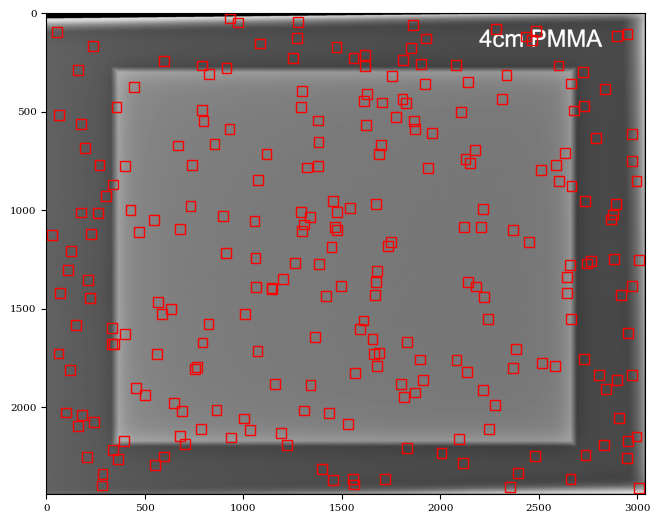

In [15]:
tile_lenght = int(raw_df["length of tile size [in px]"].median())

plt.figure(figsize=(17,10))
ax = plt.subplot(1, 2, 1)
plt.imshow(np_image, cmap="gray", vmin=vmin, vmax=vmax)

pos_x = []
pos_y = []

for i in range(250):
    
    pos_x.append(random.randint(0, np_image.shape[1] - 1 - tile_lenght))
    pos_y.append(random.randint(0, np_image.shape[0] - 1 - tile_lenght))

    rect = patches.Rectangle((pos_x[-1], pos_y[-1]), 
                         tile_lenght, tile_lenght, 
                         linewidth=1, edgecolor='r', facecolor='none');
    ax.add_patch(rect)


# Extract the corresponding features

In [16]:
def getRecord(x, y, image, tile_lenght):
    
    tile = image[y:y+tile_lenght, x:x+tile_lenght];

    row = []
    
    row.append(np.mean(tile))
    row.append(np.median(tile))
    row.append(np.std(tile))
    row.append(kurtosis(tile, axis=None))
    row.append(skew(tile, axis=None))
    
    return row

In [17]:
rows = []
for i, j in zip(pos_x, pos_y):
    rows.append(getRecord(i,j,np_image,tile_lenght))

In [18]:
test_df = pd.DataFrame(columns=dimensions, data=rows)

In [19]:
display(test_df)

,avg,median,stddev,kurtosis,skewness
0,0.314509,0.313963,0.018229,-0.579734,0.027400
1,0.474157,0.474270,0.019625,-0.395441,0.142038
2,-0.653034,-0.652349,0.024569,-0.564154,-0.111101
3,0.589011,0.588775,0.020702,-0.337445,0.043575
4,-1.498475,-1.491867,0.069053,-1.061518,-0.183042
...,...,...,...,...,...
245,-1.314670,-1.314803,0.014142,-0.468015,0.010382
246,1.065525,1.054057,0.107612,-0.994665,0.375645
247,0.390701,0.391044,0.019455,-0.479180,-0.004129
248,0.624706,0.619496,0.043384,-0.717632,0.315779


# Prediction

In [20]:
prediction = predict(test_df["kurtosis"], y)

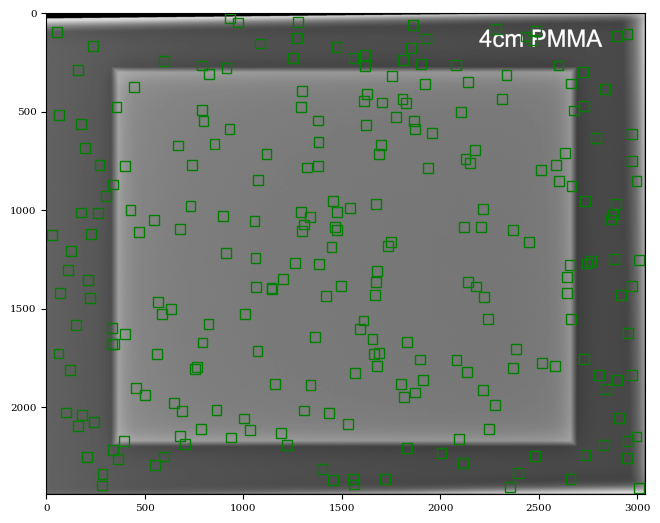

In [21]:
plt.figure(figsize=(17,10))
ax = plt.subplot(1, 2, 1)
plt.imshow(np_image, cmap="gray", vmin=vmin, vmax=vmax)

for i,j,c in zip(pos_x, pos_y, prediction):
    
    pos_x.append(random.randint(0, np_image.shape[1] - 1 - tile_lenght))
    pos_y.append(random.randint(0, np_image.shape[0] - 1 - tile_lenght))

    if c == 1:
        rect = patches.Rectangle((i, j), 
                             tile_lenght, tile_lenght, 
                             linewidth=1, edgecolor='r', facecolor='none');
    else:
        rect = patches.Rectangle((i, j), 
                             tile_lenght, tile_lenght, 
                             linewidth=1, edgecolor='g', facecolor='none');
    ax.add_patch(rect)